In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
x_train = np.load("train_data.npy")

In [4]:
x_test = np.load("test_data.npy")

In [5]:
print(x_train.shape)
print(x_test.shape)

(2672, 224, 224, 3)
(2348, 224, 224, 3)


In [8]:
y_train = pd.read_csv("train_label.csv")
y_test = pd.read_csv("test_label.csv")

In [11]:
y_train=y_train.replace(to_replace="Negative",value=3)
y_train=y_train.replace(to_replace="Meningioma",value=1)
y_train=y_train.replace(to_replace="Glioma",value=0)
y_train=y_train.replace(to_replace="Pituitary",value=2)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train =to_categorical(y_train, num_classes=4)
print(y_train.shape)

(2672, 4)


In [15]:
y_test=y_test.replace(to_replace="Negative",value=3)
y_test=y_test.replace(to_replace="Meningioma",value=1)
y_test=y_test.replace(to_replace="Glioma",value=0)
y_test=y_test.replace(to_replace="Pituitary",value=2)

In [17]:
y_test = to_categorical(y_test, num_classes=4)

In [20]:
from tensorflow.keras.layers import Input, Activation, Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
import matplotlib.image  as mpimg
from random import randint
from sklearn.utils import shuffle

In [21]:
from tensorflow.keras.models import load_model

In [87]:
from tensorflow.keras.layers import Dropout
model = Sequential()


model.add(Conv2D(16, kernel_size=(3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 56, 56, 32)      

In [89]:
model.compile(optimizer="RMSprop",
              loss='categorical_crossentropy', metrics=["accuracy"])

In [91]:
BATCH_SIZE = 16
EPOCHS = 100

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=50,
                          verbose=1,
                          mode='max',
                          restore_best_weights=True)

In [90]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    shuffle=True, 
                    verbose=1, 
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, callbacks=[earlystop])

Train on 2672 samples, validate on 2348 samples
Epoch 1/100
2672/2672 [==============================] - 22s 8ms/sample - loss: 0.7983 - accuracy: 0.7032 - val_loss: 1.1473 - val_accuracy: 0.3739
Epoch 2/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.4708 - accuracy: 0.8376 - val_loss: 1.7775 - val_accuracy: 0.5549
Epoch 3/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.3366 - accuracy: 0.8769 - val_loss: 1.5378 - val_accuracy: 0.4894
Epoch 4/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.2613 - accuracy: 0.9023 - val_loss: 0.7197 - val_accuracy: 0.7091
Epoch 5/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.2042 - accuracy: 0.9274 - val_loss: 0.7922 - val_accuracy: 0.7564
Epoch 6/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.1692 - accuracy: 0.9397 - val_loss: 0.7080 - val_accuracy: 0.7764
Epoch 7/100
2672/2672 [==============================] - 20s 7ms

Epoch 56/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0225 - accuracy: 0.9940 - val_loss: 0.9636 - val_accuracy: 0.8786
Epoch 57/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0221 - accuracy: 0.9921 - val_loss: 0.8619 - val_accuracy: 0.8790
Epoch 58/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.7831 - val_accuracy: 0.8863
Epoch 59/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0343 - accuracy: 0.9903 - val_loss: 0.9563 - val_accuracy: 0.8795
Epoch 60/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0324 - accuracy: 0.9880 - val_loss: 1.1188 - val_accuracy: 0.8688
Epoch 61/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0454 - accuracy: 0.9865 - val_loss: 1.1151 - val_accuracy: 0.8803
Epoch 62/100
2672/2672 [==============================] - 19s 7ms/sample - loss: 0.0238 - accuracy: 0.9910

In [92]:
model.save("custom_cnn.h5")
model.save_weights("custom_cnn_weights.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


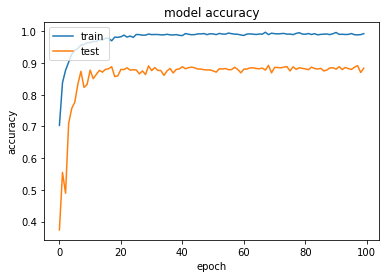

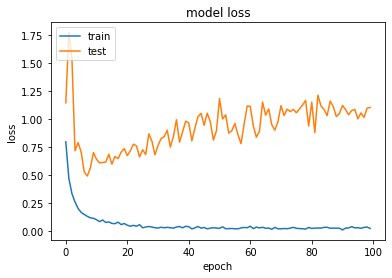

In [99]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()